In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\CJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [3]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 통계적 분석

<AxesSubplot:xlabel='SalePrice'>

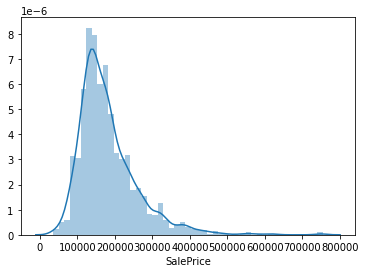

In [4]:
sns.distplot(train.SalePrice)

In [5]:
# 왜도와 첨도 구하기
print("왜도:%f" % train.SalePrice.skew())
print("첨도:%f" % train.SalePrice.kurt())

왜도:1.882876
첨도:6.536282


* 그래프를 활용한 칼럼 별 시각화

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

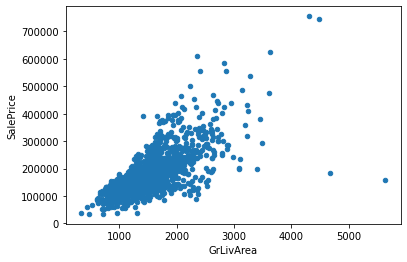

In [6]:
#산점도
var = 'GrLivArea'
data = pd.concat([train.SalePrice, train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

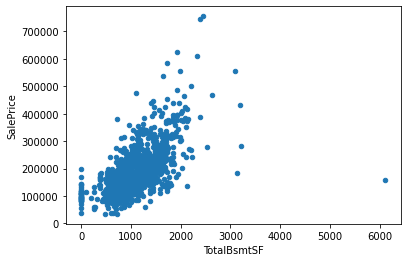

In [7]:
#산점도2
var = 'TotalBsmtSF'
data = pd.concat([train.SalePrice, train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice')

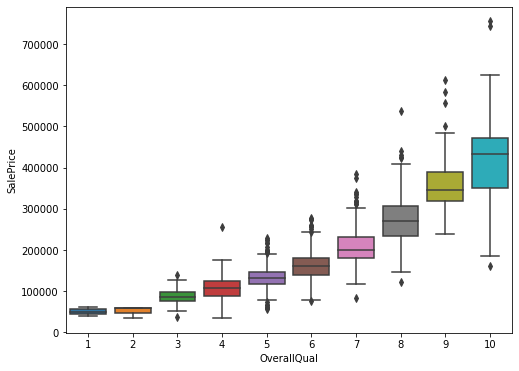

In [8]:
#범주형 변수와 SalePrice간의 관계 시각화 => boxplot
var = 'OverallQual'
data = pd.concat([train.SalePrice, train[var]], axis=1)

f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

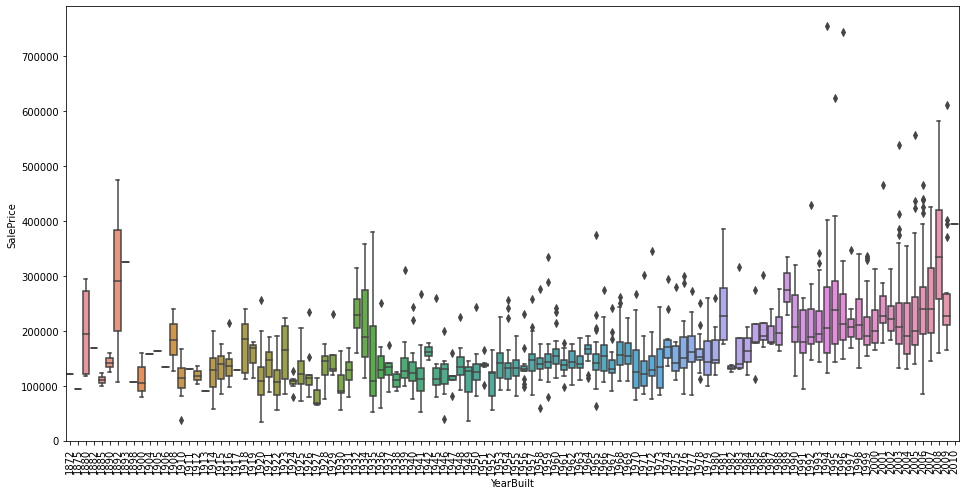

In [9]:
#범주형 변수와 SalePrice간의 관계 시각화 => boxplot
var = 'YearBuilt'
data = pd.concat([train.SalePrice, train[var]], axis=1)

f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
plt.xticks(rotation=90)

* 상관행렬

In [10]:
corrmat = train.corr()
k = 10 #히트맵에 출력할 변수의 개수
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index #상위 10개의 컬럼만 추출

<AxesSubplot:>

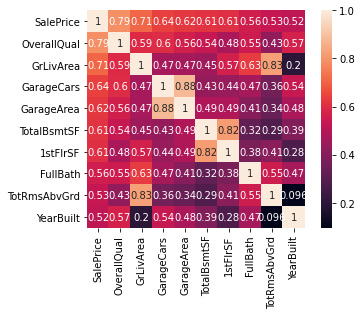

In [11]:
#numpy 피어슨 상관계수 : numpy.corrcoef()
cm = np.corrcoef(train[cols].T)
sns.heatmap(cm, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)

In [12]:
sns.set() #default seaborn 옵션 설정

C:\Users\CJ\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


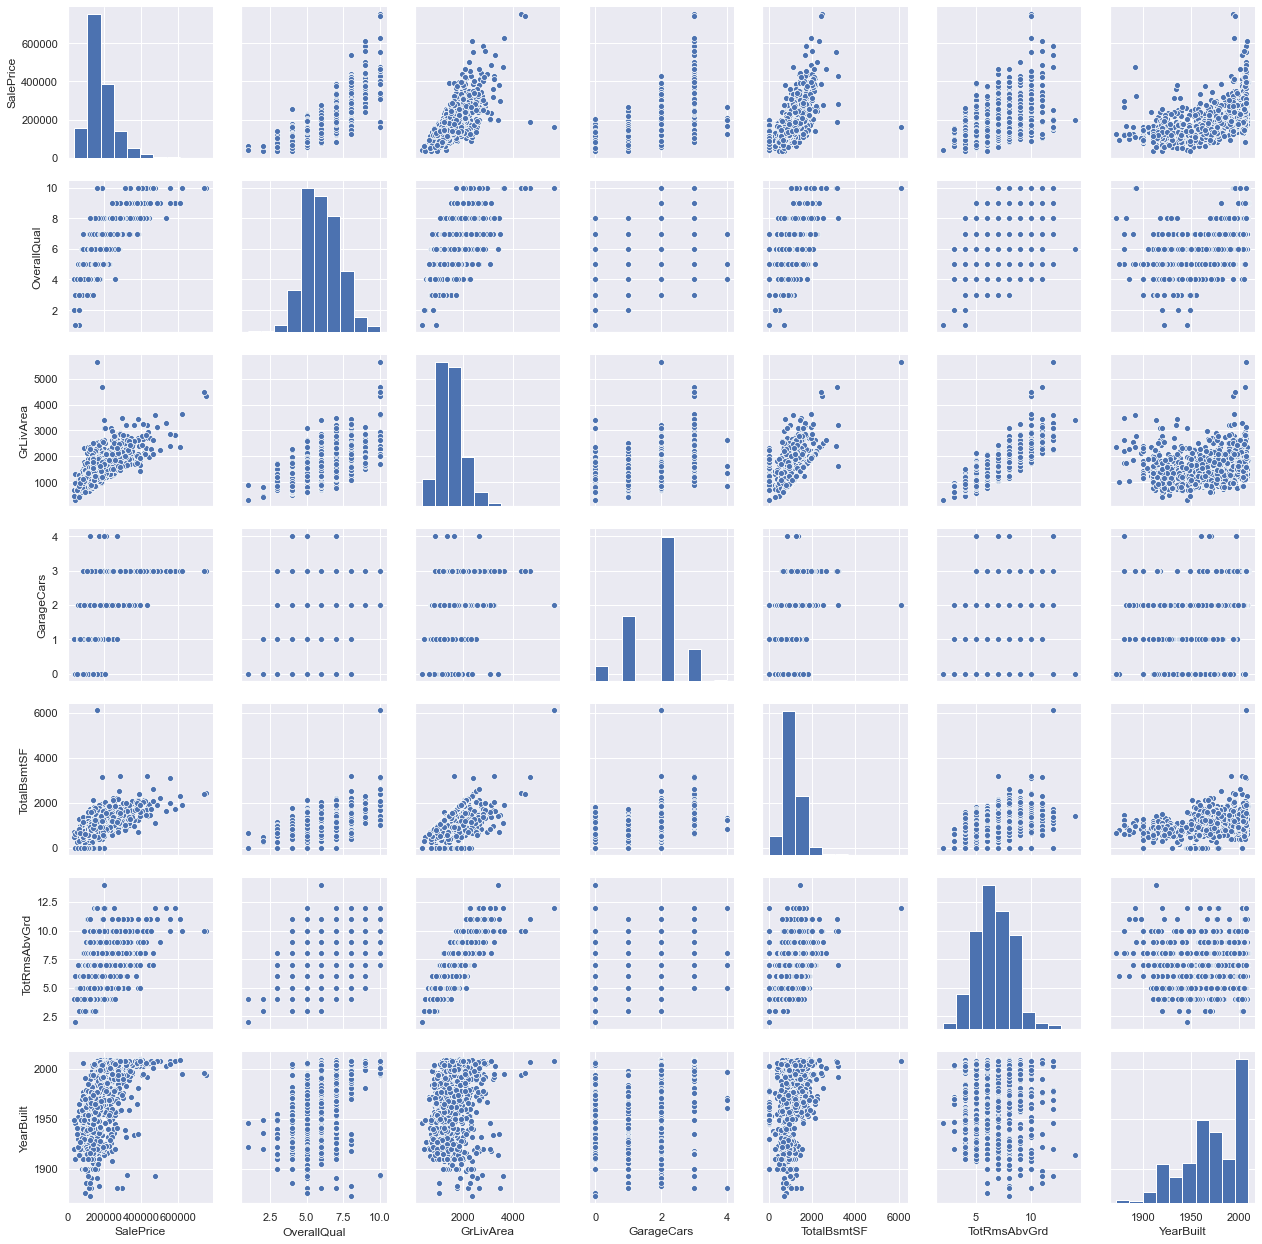

In [13]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(train[cols], size=2.5) #선형관계를 한번에 확인할 수 있는 그래프

# Feature Engineering

## 결측치처리

In [14]:
total = train.isnull().sum().sort_values(ascending=False)

In [15]:
total

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [16]:
#데이터 프레임 출력 : ToTal | Percent 컬럼
#방법1
missing_data = pd.DataFrame({"Total": total, "Percent" : total/len(train)*100})

#방법2
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


In [17]:
train = train.drop(missing_data[missing_data.Total>1].index, axis=1) #결측값이 한개이상 있는 컬럼은 버리기

In [18]:
train.info() #null값을 하나 이상 가진 데이터가 하나도 없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [19]:
#중요하지 않은 변수 제거
train = train.drop(train.loc[train.Electrical.isnull()].index) #결측치에 해당하는 행을 제거

In [20]:
train.info() #null값을 가진 데이터가 하나도 없다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1459 non-null   object
 3   LotArea        1459 non-null   int64 
 4   Street         1459 non-null   object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1459 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   int64 
 16  OverallCond    1459 non-null   int64 
 17  YearBuilt      1459 non-null   int64 
 18  YearRemodAdd   1459 non-null

In [21]:
train.isnull().sum().max()

0

## 데이터 표준화

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
saleprice_scaled = StandardScaler().fit_transform(train.SalePrice[:,np.newaxis])
saleprice_scaled
#fit_transform 함수는 2차원 데이터에 대해 변환(표준화)
#np.newaxis : 새로운 축 추가(차원증가)

C:\Users\CJ\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [24]:
saleprice_scaled[:,0] #전체 행에서 0번째 요소만 추출 -> 다시 1차원으로 변형

array([ 0.34704187,  0.0071701 ,  0.53585953, ...,  1.07713679,
       -0.48847623, -0.42081658])

In [25]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10] #표준화된 데이터를 오름차순 정렬 하위 10개
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:] #표준화된 데이터를 오름차순 정렬하여 상위 10개

In [26]:
low_range

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974],
       [-1.62295562],
       [-1.6166617 ],
       [-1.58519209],
       [-1.58519209],
       [-1.57269236]])

In [27]:
high_range

array([[3.82758058],
       [4.0395221 ],
       [4.49473628],
       [4.70872962],
       [4.728631  ],
       [5.06034585],
       [5.42191907],
       [5.58987866],
       [7.10041987],
       [7.22629831]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

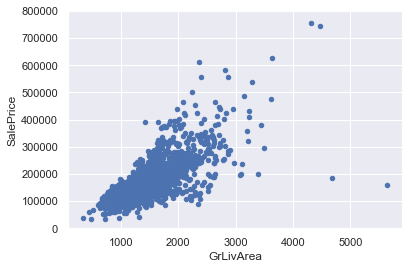

In [28]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [29]:
#deleting points
train.sort_values(by = 'GrLivArea', ascending = False)[:2] #1298, 523번째 칼럼
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

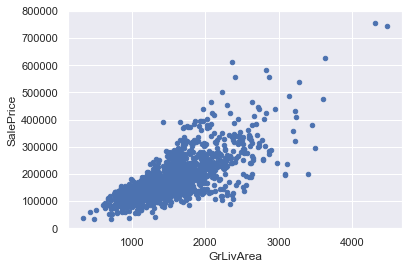

In [30]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

## 정규분포

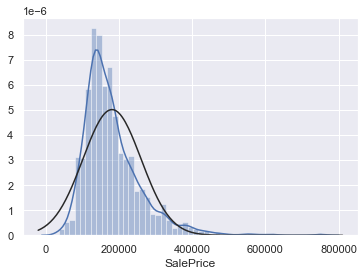

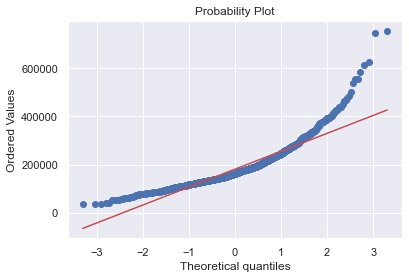

In [31]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

# 까만선 : 정규분포함수
# 파란선 : 커널분포함수
# 커널 분포의 왜도는 왼쪽으로 치우쳐있고 첨도는 정규분포보다 더 뾰족하다.

로그변환 -> 정규성을 만족하기 위해

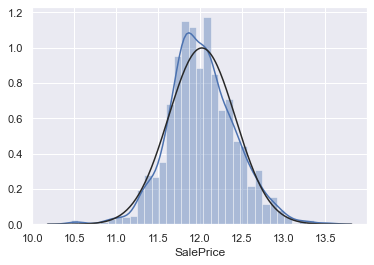

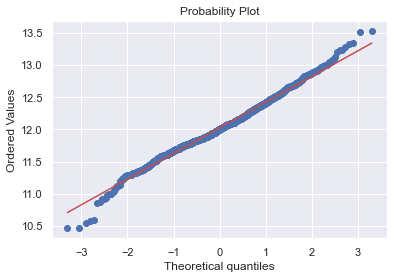

In [32]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

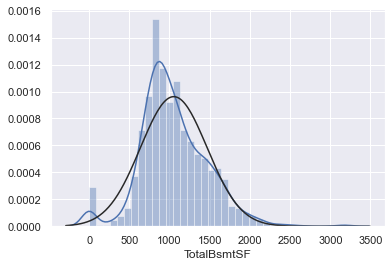

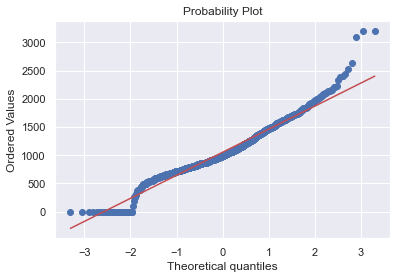

In [33]:
# 정규분포 확인
sns.distplot(train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

C:\Users\CJ\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


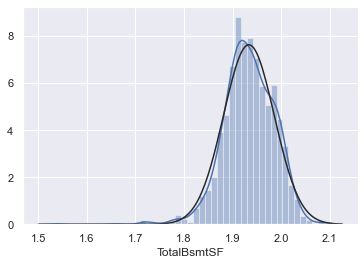

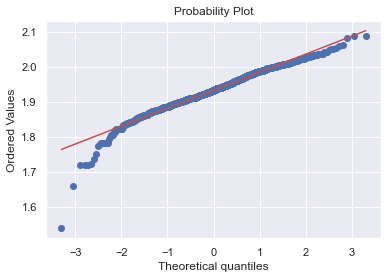

In [35]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

#transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

## 문자형 데이터 변환

In [40]:
# get_dummies() : 비수치데이터(문자형데이터)를 자동으로 가변수화
season = pd.DataFrame({"ss":["spr", 'sum', 'fal', 'wint', np.nan],
                      'num': [1,2,3,4,5]})
pd.get_dummies(season) #nan값을 제외하고 자동으로 가변수화
pd.get_dummies(season, dummy_na=True) #nan값을 포함하여 자동 가변수화

,num,ss_fal,ss_spr,ss_sum,ss_wint,ss_nan
0,1,0,1,0,0,0
1,2,0,0,1,0,0
2,3,1,0,0,0,0
3,4,0,0,0,1,0
4,5,0,0,0,0,1


In [36]:
#convert categorical variable into dummy
train = pd.get_dummies(train)
train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 222 entries, Id to SaleCondition_Partial
dtypes: float64(2), int64(34), uint8(186)
memory usage: 725.8 KB
